In [8]:
## K-Means Clustering from Scratch
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [27]:
class KMeans:
    def __init__(self, n_clusters=4, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centriods = None
        self.labels_ = None

    def fit(self,X):
        n_samples, n_features = X.shape
        #Step 1: Randomly Initialize the Centriods
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Step 1: Calculate distances from each point to each centroid
            clusters = []
            # Iterate over each point in the dataset
            # For each point, calculate the distance to each centroid and assign it to the nearest one
            for x in X:
                distances = np.linalg.norm(x - self.centroids, axis=1)
                cluster = np.argmin(distances)
                clusters.append(cluster)
            clusters = np.array(clusters)
            #clusters shape = (n_samples,)
            
            # Step 2: Update centroids
            old_centriods = self.centroids.copy()

            # Iterate over each cluster and calculate the mean of the points assigned to it
            for k in range(self.n_clusters):  
                cluster_points = X[clusters == k]  
                if len(cluster_points) > 0:  
                    self.centroids[k] = cluster_points.mean(axis=0)  
                else:  
                    # If a cluster has no points, keep the old centroid  
                    self.centroids[k] = self.centroids[k]  

        self.labels_ = self.centriods
     
    def predict(self,X):
        clusters = []  # Initialize an empty list to store cluster assignments  
        for x in X:  
            distances = np.linalg.norm(x - self.centroids, axis=1)  # Calculate distances to all centroids  
            cluster = np.argmin(distances)  # Find the closest centroid  
            clusters.append(cluster)  # Append the index of the closest centroid  
        return np.array(clusters)

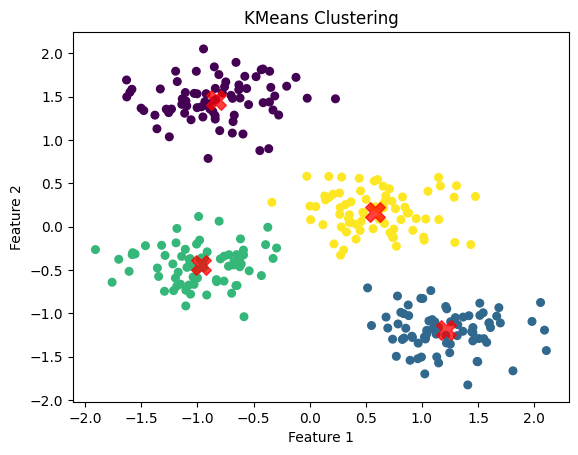

In [28]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

k_means = KMeans(n_clusters=4, max_iter=300, tol=1e-4)
k_means.fit(X)
y_pred = k_means.predict(X)

#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis')
centers = k_means.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()